<a href="https://colab.research.google.com/github/Nungdoo/deep-learning-study/blob/main/exercise09_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

훈련 세트와 검증 세트 준비
- IMDB 영화 리뷰 데이터
- 리뷰가 긍정적인지 부정적인지 판별해보기 (이진 분류)

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb

# skip_top : 가장 많이 등장한 단어 중 건너뛸 단어의 개수 지정
# 가장 흔한 단어 20개는 제외 (크게 의미 없어서)
# num_words : 훈련에 사용할 단어의 개수 지정
# 메모리 절약을 위해 100 지정
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

# 넘파이 배열의 리스트로 전달됨
print(x_train_all.shape, y_train_all.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)


In [2]:
# 훈련 세트의 샘플이 정수로 저장되어 있음
# 영단어를 고유한 정수에 일대일 대응한 것
# 2는 매핑한 어휘 사전에 없는 단어 (100개의 단어만 선택하여 없는 단어가 많음)
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [3]:
# 의미 없는 데이터 제외
# 0 : 패딩
# 1 : 글의 시작
# 2 : 없는 단어
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]

print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [4]:
# 숫자를 영단어와 매핑해보기 위해 어휘 사전 내려받기
# movie는 17과 매핑됨
word_to_index = imdb.get_word_index()
word_to_index['movie']

1654784/1641221 [==============================] - 0s 0us/step


17

In [5]:
# 훈련 세트의 정수를 영단어로 변환
# 3 이상의 정수가 영단어를 의미하므로, 3을 빼고 인덱스로 사용
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
  print(index_to_word[w-3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [7]:
# 훈련 샘플의 길이 확인
# 각 리뷰의 길이가 달라 샘플의 길이가 다름
# 샘플의 길이가 다르면 모델을 제대로 훈련시킬 수 없음
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [8]:
# 타깃 데이터 확인
# 이진 분류 문제이므로 1, 0으로 이루어짐
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [9]:
# 검증 세트 준비
# 훈련 세트 : 20000개, 검증 세트 5000개
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

샘플의 길이 맞추기
- 맞추려는 길이보다 짧을 땐 앞에 0을 채움
- 뒤에 0이 추가되면 모델의 성능이 좋지 않기 때문
- 맞추려는 길이보다 길 땐 앞의 단어를 버림
- 뒤에 나타나는 단어가 의미있을 가능성이 높기 때문

In [13]:
from tensorflow.keras.preprocessing import sequence

# 기준 길이 : 100
maxlen = 100

# 길이 맞추기
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

print(x_train_seq.shape, x_val_seq.shape)

print(x_train_seq[0])

(20000, 100) (5000, 100)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


샘플 원-핫 인코딩하기
- 샘플을 100차원으로 원-핫 인코딩

In [15]:
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

print(x_train_onehot.shape)

print(x_train_onehot.nbytes)

(20000, 100, 100)
800000000


# 순환 신경망 클래스 구현하기

In [18]:
import tensorflow as tf

class RecurrentNetwork:

  # 은닉층의 개수 대신 셀 개수를 입력 받음
  # 셀에 필요한 가중치 w1h, w1x 선언
  # 타임 스텝을 거슬러 그레이디언트를 전파하기 위해, 활성화 출력을 모두 갖고 있을 h 선언
  def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
    self.n_cells = n_cells
    self.batch_size = batch_size
    self.w1h = None
    self.w1x = None
    self.b1 = None
    self.w2 = None
    self.b2 = None
    self.h = None
    self.losses = []
    self.val_losses = []
    self.lr = learning_rate

  # 직교 행렬 초기화 : 순환 셀에서 은닉 상태를 위한 가중치가 반복해서 곱해질 때 너무 커지거나 작아지지 않게 해줌
  def init_weights(self, n_features, n_classes):
    orth_init = tf.initializers.Orthogonal()
    glorot_init = tf.initializers.GlorotUniform()

    self.w1h = orth_init((self.n_cells, self.n_cells)).numpy()      # (셀 개수, 셀 개수)
    self.w1x = glorot_init((n_features, self.n_cells)).numpy()      # (특성 개수, 셀 개수)
    self.b1 = np.zeros(self.n_cells)                                # 은닉층의 크기
    self.w2 = glorot_init((self.n_cells, n_classes)).numpy()        # (셀 개수, 클래스 개수)
    self.b2 = np.zeros(n_classes)

  # 정방향 계산
  def forpass(self, x):
    # 각 타임 스텝의 은닉 상태를 저장하기 위한 h 초기화
    # 첫 번째 타임 스텝의 이전 은닉 상태는 없으므로, 0으로 채워진 배열로 초기화
    self.h = [np.zeros((x.shape[0], self.n_cells))]               # (샘플 개수, 셀 개수)

    # 입력 x의 첫 번째 배치 차원과 두 번째 타임 스텝 차원을 바꿉니다.
    # 미니 배치 안에 있는 모든 샘플의 첫 번째 타임 스텝을 한 번에 처리하고 그 다음 타임 스텝을 한번에 처리해야 하므로
    seq = np.swapaxes(x, 0, 1)

    # 각 샘플의 모든 타임 스텝에 대한 정방향 계산
    # 계산된 은닉 상태를 h에 순서대로 추가함
    for x in seq:
      z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
      h = np.tanh(z1)                     # 활성화 함수를 적용합니다.
      self.h.append(h)                    # 역전파를 위해 은닉 상태를 저장합니다.
      z2 = np.dot(h, self.w2) + self.b2   # 출력층의 선형식을 계산합니다.
    return z2

  # 역방향 계산
  def backprop(self, x, err):
    m = len(x)    # 샘플 개수

    # 출력층의 가중치와 절편에 대한 그레이디언트를 계산합니다.
    w2_grad = np.dot(self.h[-1].T, err) / m
    b2_grad = np.sum(err) / m

    # 모든 샘플의 타임 스텝을 한 번에 처리하기 위해 배치 차원과 타임 스텝 차원을 바꿈
    seq = np.swapaxes(x, 0, 1)

    w1h_grad = w1x_grad = b1_grad = 0
    # err_to_cell : Z1에 대하여 손실 함수를 미분한 도함수의 결괏값
    err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2)
    # 모든 타임 스텝을 거슬러 가면서 그레이디언트를 전파합니다.
    # 타임 스텝을 거슬러 올라가며 그레이디언트를 전파할 때 동일한 가중치를 반복적으로 곱해, 이로 인해 그레이디언트가 너무 커지거나 작아지는 문제가 발생
    # 이를 방지하기 위해 그레이디언트를 전파하는 타임 스텝의 수(TBPTT)를 제한 : 10
    for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
      w1h_grad += np.dot(h.T, err_to_cell)
      w1x_grad += np.dot(x.T, err_to_cell)
      b1_grad += np.sum(err_to_cell, axis=0)
      err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)

    w1h_grad /= m
    w1x_grad /= m
    b1_grad /= m

    return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad

  def sigmoid(self, z):
    z = np.clip(z, -100, None)    # 안전한 계산을 위해 clip
    a = 1 / (1 + np.exp(-z))      # 시그모이드 계산
    return z

  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    y = y.reshape(-1, 1)                                  # 타깃을 열 벡터로 바꿉니다.
    y_val = y_val.reshape(-1, 1)                          # 검증용 타깃을 열 벡터로 바꿉니다.
    self.init_weights(x.shape[2], y.shape[1])             # 은닉층과 출력층의 가중치 초기화
    np.random.seed(42)

    for i in range(epochs):
      print('에포크', i, end=' ')
      batch_losses = []
      # 미니 배치 순환
      for x_batch, y_batch in self.gen_batch(x, y):
        print('.', end='')
        a = self.training(x_batch, y_batch)
        a = np.clip(a, 1e-10, 1-1e-10)                                    # 안전한 로그 계산을 위해 클리핑합니다.
        loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))    # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
        batch_losses.append(loss)
      print()
      self.losses.append(np.mean(batch_losses))           # 에포크마다 평균 손실을 저장
      self.update_val_loss(x_val, y_val)                  # 검증 세트에 대한 손실을 계산합니다.

  # 미치 배치 제너레이터
  def gen_batch(self, x, y):
    length = len(x)
    bins = length // self.batch_size      # 미니 배치 횟수
    if length % self.batch_size:
      bins += 1
    indexes = np.random.permutation(np.arange(len(x)))
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i + 1)
      yield x[start:end], y[start:end]    # batch_size만큼 슬라이싱하여 반환

  def training(self, x, y):
    m = len(x)                                          # 샘플 개수
    z = self.forpass(x)                                 # 정방향 계산을 수행합니다.
    a = self.sigmoid(z)                                 # 활성화 함수를 적용합니다.
    err = -(y - a)                                      # 오차를 계산합니다.
    
    # 오차를 역전파하여 그레이디언트를 계산합니다.
    w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)

    # 셀의 가중치와 절편을 업데이트합니다.
    self.w1h -= self.lr * w1h_grad
    self.w1x -= self.lr * w1x_grad
    self.b1 -= self.lr * b1_grad

    # 출력층의 가중치와 절편을 업데이트합니다.
    self.w2 -= self.lr * w2_grad
    self.b2 -= self.lr * b2_grad

    # 출력층의 활성화 출력 a를 반환합니다.
    return a

  def predict(self, x):
    z = self.forpass(x)                   # 정방향 계산
    return z > 0                          # 스텝 함수 적용

  def score(self, x, y):
    # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
    return np.mean(self.predict(x) == y.reshape(-1, 1))

  def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val)               # 정방향 계산
    a = self.sigmoid(z)                   # 활성화 함수 적용
    a = np.clip(a, 1e-10, 1-1e-10)        # 출력값 클리핑
    val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
    self.val_losses.append(val_loss)

# 순환 신경망 모델 훈련시키기

In [ ]:
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)
rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

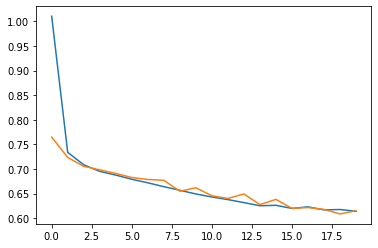

In [20]:
import matplotlib.pyplot as plt

# 손실 그래프 그리기
plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [21]:
# 검증 세트 정확도 평가하기
rn.score(x_val_onehot, y_val)

0.4952